In [1]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

In [2]:
#Generate dataset
import cv2
import csv
import glob
import numpy as np

# Convert data to numpy array
data_np = np.array(mnist.data)
target_np = np.array(mnist.target)

# Create CSV file
header = ["label"]
for i in range(784):
    header.append("pixel" + str(i))

with open('mnist_dataset.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Convert and write MNIST data to CSV
for i in range(len(data_np)):
    label = target_np[i]
    data = [label]
    for pixel in data_np[i]:
        data.append(pixel)
    with open('mnist_dataset.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [3]:
import pandas as pd
from sklearn.utils import shuffle

# Load dataset from CSV
data = pd.read_csv('mnist_dataset.csv')

# Shuffle the dataset
data = shuffle(data)

# Separate features (X) and labels (Y)
X = data.drop("label", axis=1)
Y = data["label"]

# Print the shape of features and labels
print("Shape of features (X):", X.shape)
print("Shape of labels (Y):", Y.shape)



Shape of features (X): (70000, 784)
Shape of labels (Y): (70000,)


In [4]:
print(X.index)

Index([25051, 25289,  1137, 62551, 37947, 27481,  8201, 39539, 32506, 19768,
       ...
       60723, 39307,  6545, 36978, 50443, 14983, 55239, 62695, 49326, 38372],
      dtype='int64', length=70000)


8


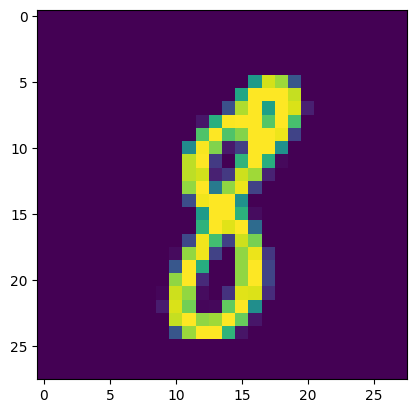

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 300
img = X.loc[idx].values.reshape(28,28).astype(float)
print(Y[idx])
plt.imshow(img)

In [6]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import joblib

# Load your dataset into X and Y
# Assuming you have already loaded your dataset into X and Y

# Create the directory if it doesn't exist
if not os.path.exists("model"):
    os.makedirs("model")

# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8)

# Perform data preprocessing
train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

# Remove the extra dimension introduced by np.expand_dims
train_x = np.squeeze(train_x)
test_x = np.squeeze(test_x)

# Define and train the classifier
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x, train_y)

# Save the trained model
joblib.dump(classifier, "model/digit_recognizer")

# Make predictions
prediction = classifier.predict(test_x)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(prediction, test_y)
print("Accuracy =", accuracy)



Accuracy = 0.9202857142857143


C:\Users\niraj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


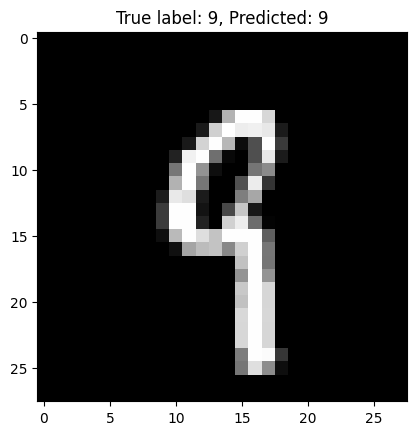

In [48]:
# Function to predict and display a particular index
def predict_and_display(index):
    if index >= len(test_x):
        print("Index out of range.")
        return
    
    # Get the image at the specified index
    image = test_x.iloc[index].values.reshape(28, 28)  # Convert pandas Series to numpy array and reshape
    label = test_y.iloc[index]

    # Make prediction
    prediction = classifier.predict([image.flatten()])[0]

    # Display the image and prediction
    plt.imshow(image, cmap='gray')
    plt.title(f"True label: {label}, Predicted: {prediction}")
    plt.show()

# Example usage: predict and display the image at index 31172
predict_and_display(11252)
